In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

# Challenge 1

In [2]:
n_sample = 1000
b0 = 0
b1 = 2
X = pd.DataFrame((np.array(range(n_sample)) + 1) / 5, columns = ['x1'])
y = pd.DataFrame({'y': b0 + b1 * X['x1'].map(np.log) + np.random.randn(n_sample)})

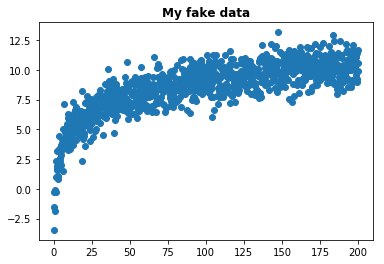

In [3]:
plt.scatter(X['x1'], y['y'])
plt.title("My fake data", fontweight = "bold")
plt.show()

In [4]:
quad_pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
fit = quad_pipe.fit(X, y)

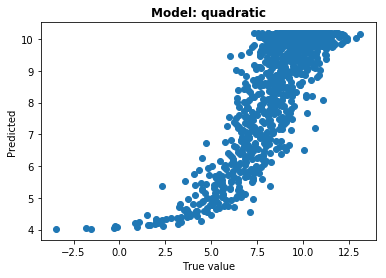

In [5]:
plt.scatter(y, quad_pipe.predict(X))
plt.title("Model: quadratic", fontweight = "bold")
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.show()

In [6]:
log_pipe = make_pipeline(FunctionTransformer(np.log), LinearRegression())
fit = log_pipe.fit(X, y)

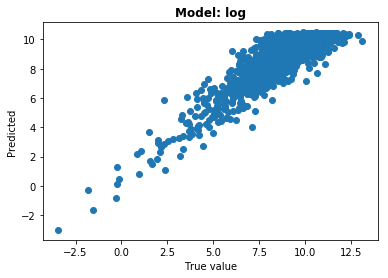

In [7]:
plt.scatter(y, log_pipe.predict(X))
plt.title("Model: log", fontweight = "bold")
plt.xlabel("True value")
plt.ylabel("Predicted")
plt.show()

# Challenge 2

In [8]:
b2 = 3
y = pd.DataFrame({'y': b0 + b1 * X['x1'] + b2 * (X['x1'] ** 2) + np.random.randn(n_sample)})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
model = LinearRegression()
fit = model.fit(X_train, y_train)

In [11]:
tr_mse = mean_squared_error(y_train, model.predict(X_train))
print("training MSE:", tr_mse)

training MSE: 78098567.5296


In [12]:
ts_mse = mean_squared_error(y_test, model.predict(X_test))
print("testing MSE:", tr_mse)

testing MSE: 78098567.5296


# Challenge 3

In [13]:
result = []
for degree in range(8):
    pipe_lm = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    fit = pipe_lm.fit(X_train, y_train)
    tr_mse = mean_squared_error(y_train, pipe_lm.predict(X_train))
    ts_mse = mean_squared_error(y_test, pipe_lm.predict(X_test))
    r2 = r2_score(y_test, pipe_lm.predict(X_test))
    
    statsmodel = sm.OLS(y_test, PolynomialFeatures(degree).fit(X_train).transform(X_test))
    aic = statsmodel.fit().aic
    
    result += [[degree, tr_mse, ts_mse, r2, aic]]
result = pd.DataFrame(result, columns = ['degree', 'tr_mse', 'ts_mse', 'r2', 'aic'])

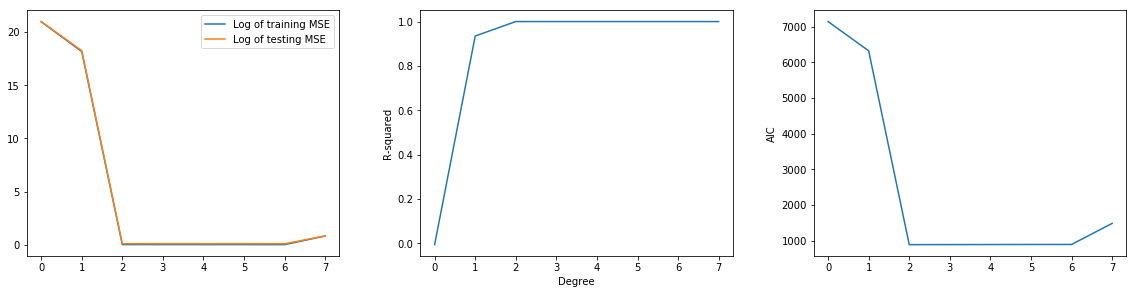

In [17]:
plt.subplots(1, 3, figsize = (16, 4))
plt.tight_layout(w_pad = 5)
plt.subplot(1, 3, 1)
plt.plot(result['degree'], result['tr_mse'].map(np.log), label = 'Log of training MSE')
plt.plot(result['degree'], result['ts_mse'].map(np.log), label = 'Log of testing MSE')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(result['degree'], result['r2'])
plt.xlabel("Degree")
plt.ylabel('R-squared')
plt.subplot(1, 3, 3)
plt.plot(result['degree'], result['aic'])
plt.ylabel('AIC')
plt.show()

# Challenge 4

In [15]:
learning_curve = []
for m in range(5, X.shape[0], 5):
    new_X_train = X.iloc[:m]
    new_y_train = y.iloc[:m]
    pipe_lm = make_pipeline(PolynomialFeatures(2), LinearRegression())
    fit = pipe_lm.fit(new_X_train, new_y_train)
    tr_mse = mean_squared_error(new_y_train, pipe_lm.predict(new_X_train))
    ts_mse = mean_squared_error(y_test, pipe_lm.predict(X_test))
    learning_curve += [[m, tr_mse, ts_mse]]
learning_curve = pd.DataFrame(learning_curve, columns = ['m', 'tr_mse', 'ts_mse'])

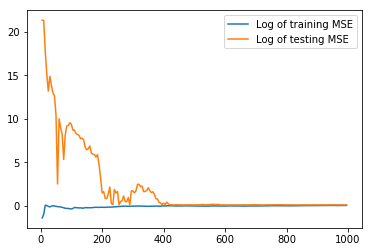

In [16]:
plt.plot(learning_curve['m'], learning_curve['tr_mse'].map(np.log), label = 'Log of training MSE')
plt.plot(learning_curve['m'], learning_curve['ts_mse'].map(np.log), label = 'Log of testing MSE')
plt.legend()
plt.show()